**Визуализируем количесво фильмов на разных стриминговых сервисах по годам,
используя данные из CSV файла**

устанавливаем библиотеки

In [9]:
# %pip install pandas

In [10]:
# %pip install matplotlib

In [11]:
# %pip install pymysql

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Загружаем данные из файла CSV c помощью pandas
data = pd.read_csv('MoviesOnStreamingPlatforms.csv')

data

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0


In [4]:
# Очиcтим данные, заменив значение NaN на None
data = data.where(pd.notnull(data), None)

In [7]:
# Группируем данные по году и платформе
grouped_data = data.groupby(['Year', 'Type']).agg({
    'Netflix': 'sum',
    'Hulu': 'sum',
    'Prime Video': 'sum',
    'Disney+': 'sum'
}).reset_index()

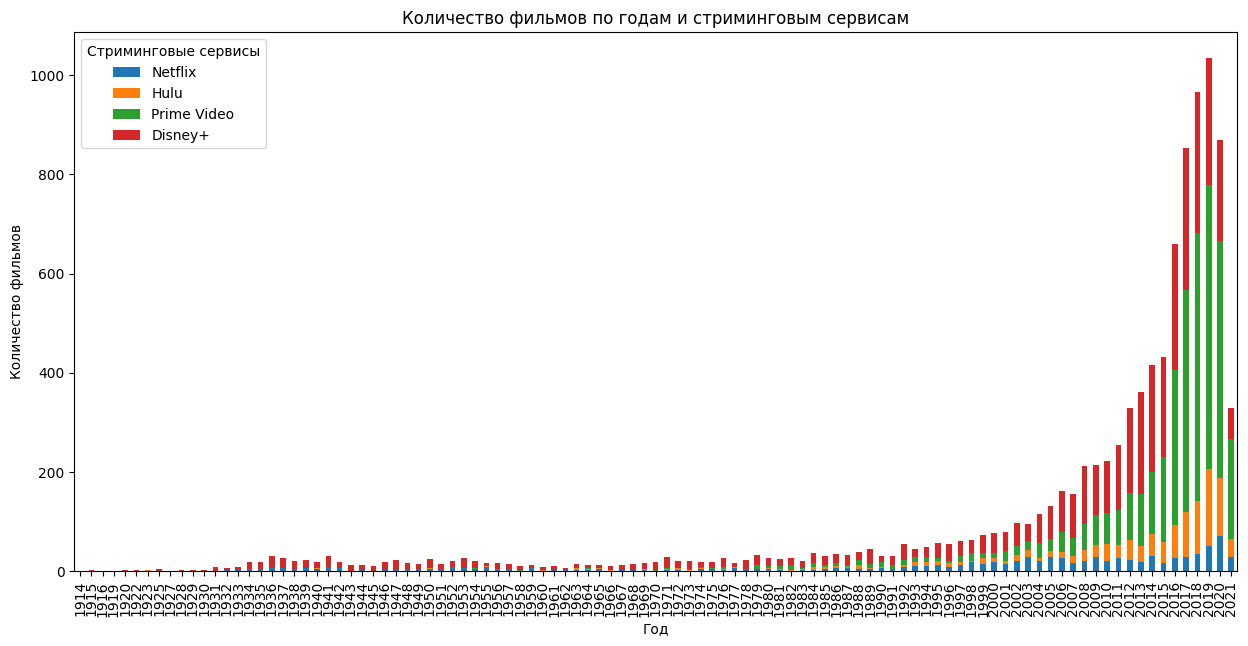

In [8]:
# Создание сводной таблицы с количеством фильмов для каждой стриминговой платформы и года
pivot_table = pd.pivot_table(grouped_data, values=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], index='Year', columns='Type', aggfunc='sum', fill_value=0)

# Создание диаграммы
pivot_table.plot(kind='bar', stacked=True, figsize=(15,7))

# метки осей и заголовок
plt.title('Количество фильмов по годам и стриминговым сервисам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], title='Стриминговые сервисы')

plt.show()

**Подключение к базе данных MySql**

In [2]:
import pymysql

# Создаем подключение к базе данных
connection = pymysql.connect(
    host="localhost",
    user='root',
    password='your_pass',
    database='movies'
)


# Проверяем поключение
if connection.open:
    print("Подключение к базе данных успешно.")
else:
    print("Не удалось подключиться к базе данных")

# Закрытие подключения к БД
connection.close()

Подключение к базе данных успешно.


**part2**

In [3]:
# Создаем подключение к базе данных
connection = pymysql.connect(
    host="localhost",
    user='root',
    password='your_pass',
    database='movies'
)

# Загружаем данные из файла CSV c помощью pandas
data = pd.read_csv('MoviesOnStreamingPlatforms.csv')

#############################################
# Очистка данных, замена значений Nan на None
data = data.where(pd.notnull(data), None)
#############################################

In [4]:
data

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,None,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,None,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,None,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,None,10/100,0,0,0,1,0


In [30]:
# Создадим список кортежей для множественной вставки
values = []
for index, row in data.iterrows():
    values.append((
        row["ID"], row["Title"], row['Year'], row["Age"], row["Rotten Tomatoes"],
        row['Netflix'], row['Hulu'], row['Prime Video'], row['Disney+'], row['Type']
    ))

In [5]:
# Создаем таблицу для данных из csv
with connection.cursor() as coursor:
    coursor.execute("""
        CREATE TABLE IF NOT EXISTS movies (
            id INT PRIMARY KEY,
            title VARCHAR(255),
            year INT,
            age VARCHAR(10),
            rotten_tomatoes VARCHAR(10),
            netflix BOOLEAN,
            hulu BOOLEAN,
            prime_video BOOLEAN,
            disney_plus BOOLEAN,
            type VARCHAR(255)
        )
    """)
    connection.commit()

In [ ]:
# Добавляем данные множественным INSERT
with connection.cursor() as coursor:
    query = """
        INSERT IGNORE INTO movies
            (id, title, year, age, rotten_tomatoes, netflix, hulu, prime_video, disney_plus, type) 
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    coursor.executemany(query, values)
    connection.commit()

In [9]:
# Запрос данныз из таблицы `movies` БД MySQL и создаем DataFrame
query = """
    SELECT year, type, netflix, hulu, prime_video, disney_plus
    FROM movies
    WHERE type IS NOT NULL
"""

data_from_db = pd.read_sql(query, connection)

data_from_db

C:\Users\q10sn1k_\AppData\Local\Temp\ipykernel_15284\226419322.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_from_db = pd.read_sql(query, connection)


,year,type,netflix,hulu,prime_video,disney_plus
0,2019,0,1,0,0,0
1,2016,0,1,0,0,0
2,2020,0,1,0,0,0
3,2001,0,1,0,0,0
4,2018,0,1,0,0,0
...,...,...,...,...,...,...
9510,2020,0,0,0,0,1
9511,2020,0,0,0,0,1
9512,2019,0,0,0,0,1
9513,2011,0,0,0,0,1


In [10]:
# группируем данные по году и платформе (стриминговому сервису)
grouped_data = data_from_db.groupby(['year', 'type']).agg({
    'netflix': 'sum',
    'hulu': 'sum',
    'prime_video': 'sum',
    'disney_plus': 'sum'
}).reset_index()

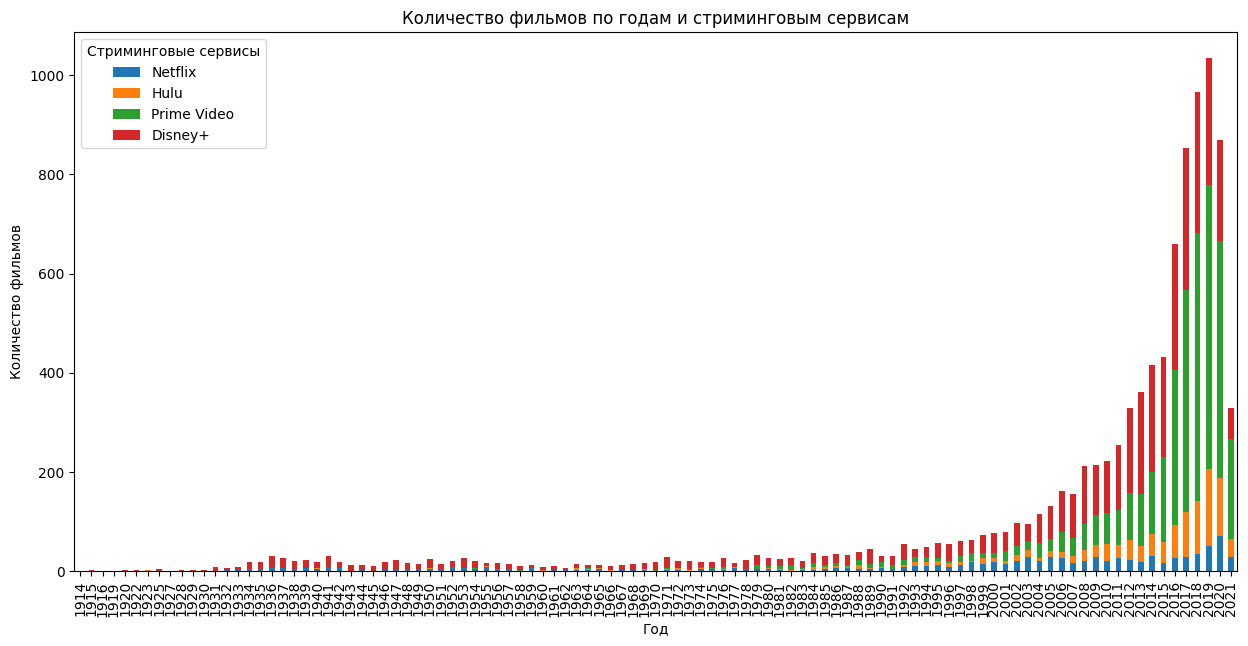

In [11]:
import matplotlib.pyplot as plotting
plt.rcParams.update({'figure.max_open_warning': 0})

# Сводная таблица с количеством фильмов для каждой стриминговой платформы и года
pivot_table = pd.pivot_table(grouped_data, values=['netflix', 'hulu', 'prime_video', 'disney_plus'], index='year', columns='type', aggfunc='sum', fill_value=0)

# построение диаграммы
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 7))


################################
plotting.title('Количество фильмов по годам и стриминговым сервисам')
plotting.xlabel('Год')
plotting.ylabel('Количество фильмов')
plotting.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], title='Стриминговые сервисы')

plotting.show()

In [58]:
connection.close()